In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

df = pd.read_csv("cleaned_aus_all.csv", index_col=[0])


# df = df[df['Location'] == 'WITCHCLIFFE']

df = df[df['Location'] == 'WALPOLE']

df["Date"] = pd.to_datetime(df["Date"])
df = (df[df['Date'] >= '2013-04-01'])

# df['Location'].unique()
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
128291,2013-04-01,WALPOLE,12.1,25.0,0.2,3.807291,6.918742,SE,30.0,NNE,...,87.0,66.0,1021.3,1019.5,4.738316,4.841100,17.2,24.0,NO,NO
128292,2013-04-02,WALPOLE,14.7,29.9,0.0,6.840968,7.754023,NE,43.0,NE,...,68.0,54.0,1020.1,1017.3,3.948732,4.504344,19.4,29.0,NO,NO
128293,2013-04-03,WALPOLE,18.0,30.9,0.0,8.192026,6.792817,NE,35.0,NNE,...,56.0,66.0,1018.0,1015.1,4.427749,5.732397,22.3,25.5,NO,NO
128294,2013-04-04,WALPOLE,18.6,33.8,0.0,9.868503,10.324927,WNW,39.0,NNE,...,42.0,32.0,1014.1,1011.0,2.850259,3.066947,23.6,32.8,NO,NO
128295,2013-04-05,WALPOLE,16.5,26.1,0.0,5.520695,6.931183,WSW,39.0,NW,...,88.0,60.0,1014.3,1014.3,5.609118,5.327839,19.6,23.8,NO,NO


In [38]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [39]:
# One-hot encoding for the categorical columns
encoded_data = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])

# Display the first few rows of the encoded data
encoded_data.head()
df = encoded_data.copy()

In [40]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
128291,2013-04-01,WALPOLE,12.1,25.0,0.2,3.807291,6.918742,30.0,7.0,11.0,...,False,False,True,False,False,False,False,False,False,False
128292,2013-04-02,WALPOLE,14.7,29.9,0.0,6.840968,7.754023,43.0,20.0,9.0,...,False,False,True,False,False,False,False,False,False,False
128293,2013-04-03,WALPOLE,18.0,30.9,0.0,8.192026,6.792817,35.0,13.0,11.0,...,False,False,True,False,False,False,False,False,False,False
128294,2013-04-04,WALPOLE,18.6,33.8,0.0,9.868503,10.324927,39.0,20.0,15.0,...,False,False,False,False,False,False,False,False,True,False
128295,2013-04-05,WALPOLE,16.5,26.1,0.0,5.520695,6.931183,39.0,15.0,17.0,...,False,False,False,False,False,False,False,False,True,False


In [41]:
#Divide the data into train and test
test_size =np.round(df.shape[0] *30/100).astype(int)
df1_train = df.iloc[test_size:,:]
df1_test = df.iloc[:test_size,:]

df1_train.dtypes


Date              datetime64[ns]
Location                  object
MinTemp                  float64
MaxTemp                  float64
Rainfall                 float64
                       ...      
WindDir3pm_SSW              bool
WindDir3pm_SW               bool
WindDir3pm_W                bool
WindDir3pm_WNW              bool
WindDir3pm_WSW              bool
Length: 68, dtype: object

In [42]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', '

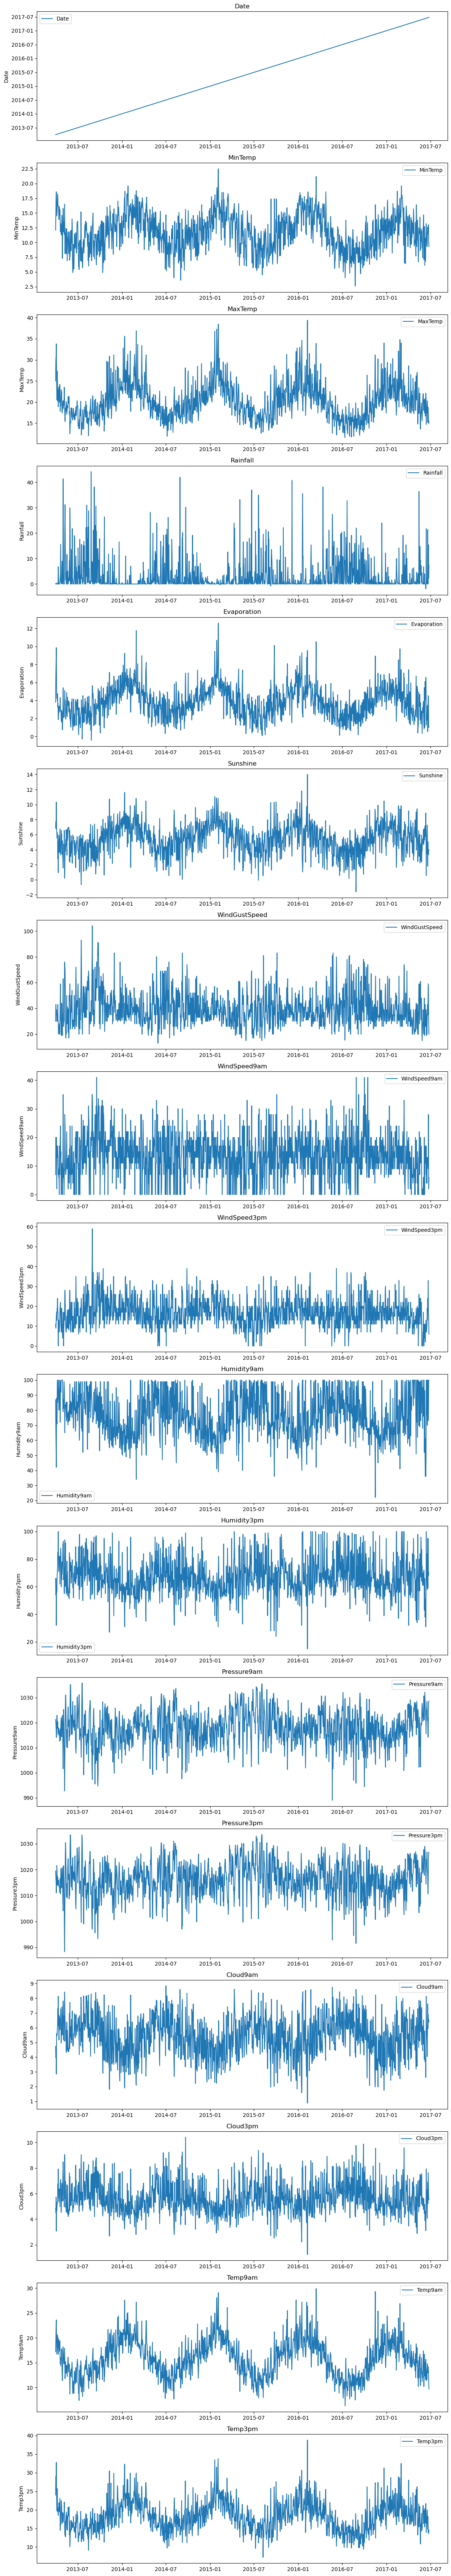

In [43]:
import matplotlib.pyplot as plt

# Columns to exclude from plotting
exclude_columns = ['Location', 'RainToday', 'RainTomorrow']
exclude_columns += [col for col in encoded_data.columns if 'WindGustDir' in col]
exclude_columns += [col for col in encoded_data.columns if 'WindDir9am' in col]
exclude_columns += [col for col in encoded_data.columns if 'WindDir3pm' in col]

# Columns to plot
plot_columns = [col for col in encoded_data.columns if col not in exclude_columns]

# Plotting
fig, axes = plt.subplots(nrows=len(plot_columns), figsize=(12, 4 * len(plot_columns)))
for i, col in enumerate(plot_columns):
    axes[i].plot(encoded_data['Date'], encoded_data[col], label=col)
    axes[i].set_title(col)
    axes[i].set_ylabel(col)
    axes[i].legend()

plt.tight_layout()
plt.show()


In [44]:
# Drop rows before 2013-04-01
# encoded_data_filtered = encoded_data[encoded_data['Date'] >= '2013-04-01']
encoded_data_filtered = encoded_data.copy()
# Display the first few rows of the filtered dataset
encoded_data_filtered.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
128291,2013-04-01,WALPOLE,12.1,25.0,0.2,3.807291,6.918742,30.0,7.0,11.0,...,False,False,True,False,False,False,False,False,False,False
128292,2013-04-02,WALPOLE,14.7,29.9,0.0,6.840968,7.754023,43.0,20.0,9.0,...,False,False,True,False,False,False,False,False,False,False
128293,2013-04-03,WALPOLE,18.0,30.9,0.0,8.192026,6.792817,35.0,13.0,11.0,...,False,False,True,False,False,False,False,False,False,False
128294,2013-04-04,WALPOLE,18.6,33.8,0.0,9.868503,10.324927,39.0,20.0,15.0,...,False,False,False,False,False,False,False,False,True,False
128295,2013-04-05,WALPOLE,16.5,26.1,0.0,5.520695,6.931183,39.0,15.0,17.0,...,False,False,False,False,False,False,False,False,True,False


In [45]:
from prophet import Prophet

prophet_data = encoded_data_filtered[['Date', 'Rainfall']].rename(columns={'Date': 'ds', 'Rainfall': 'y'})

In [46]:
# Rename columns for Prophet
prophet_data = encoded_data_filtered.rename(columns={'Date': 'ds', 'Rainfall': 'y'})

# Split the data into training and test sets (using the last 365 days as test data)
train_data = prophet_data[:-365]
test_data = prophet_data[-365:]

# Display the first few rows of the training data
train_data.head()

,ds,Location,MinTemp,MaxTemp,y,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
128291,2013-04-01,WALPOLE,12.1,25.0,0.2,3.807291,6.918742,30.0,7.0,11.0,...,False,False,True,False,False,False,False,False,False,False
128292,2013-04-02,WALPOLE,14.7,29.9,0.0,6.840968,7.754023,43.0,20.0,9.0,...,False,False,True,False,False,False,False,False,False,False
128293,2013-04-03,WALPOLE,18.0,30.9,0.0,8.192026,6.792817,35.0,13.0,11.0,...,False,False,True,False,False,False,False,False,False,False
128294,2013-04-04,WALPOLE,18.6,33.8,0.0,9.868503,10.324927,39.0,20.0,15.0,...,False,False,False,False,False,False,False,False,True,False
128295,2013-04-05,WALPOLE,16.5,26.1,0.0,5.520695,6.931183,39.0,15.0,17.0,...,False,False,False,False,False,False,False,False,True,False


In [47]:
# Initialize the Prophet model
model = Prophet()

# Add the one-hot encoded columns (and any other relevant numerical columns) as regressors
regressor_columns = [col for col in train_data.columns if 'WindGustDir' in col] + \
                    [col for col in train_data.columns if 'WindDir9am' in col] + \
                    [col for col in train_data.columns if 'WindDir3pm' in col] + \
                    ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 
                     'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                     'Pressure3pm', 'Temp9am', 'Temp3pm']

for column in regressor_columns:
    model.add_regressor(column)

In [48]:
import time

start_time = time.time()

# Train the model
model.fit(train_data)


end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time} seconds")

01:50:25 - cmdstanpy - INFO - Chain [1] start processing
01:50:25 - cmdstanpy - INFO - Chain [1] done processing


Time taken: 0.3161046504974365 seconds


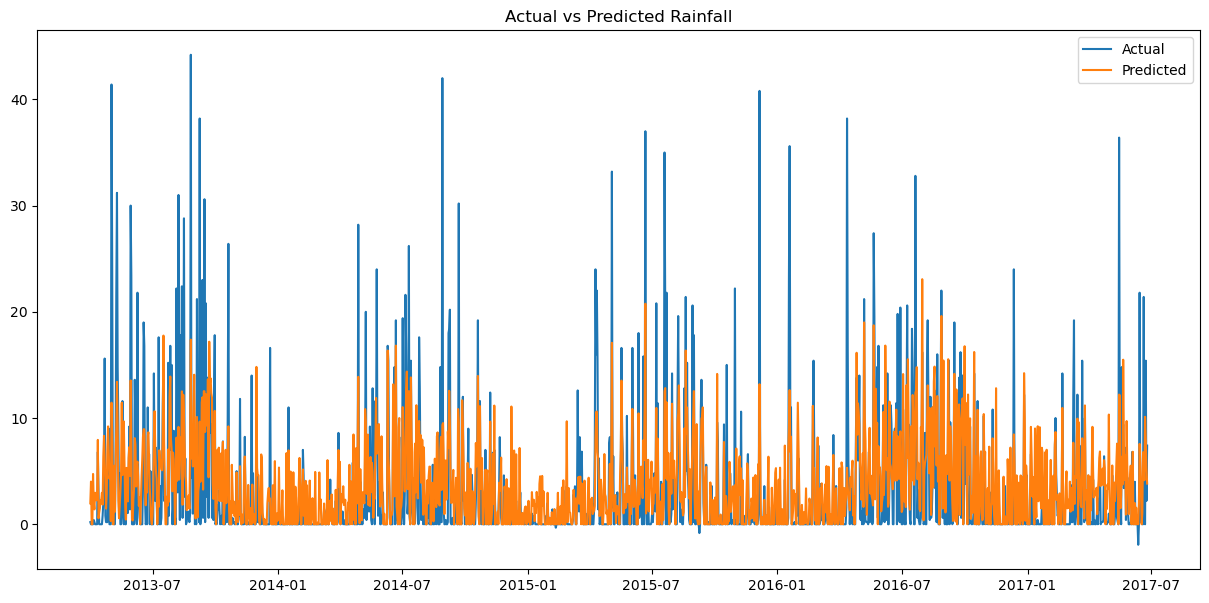

In [49]:
# Assuming 'forecast_df' is your DataFrame containing Prophet forecasts
future = model.make_future_dataframe(periods=1095)
forecast = model.predict(pd.concat([train_data, test_data]))

forecast['yhat'] = forecast['yhat'].apply(lambda x: max(0, x))

# Plot actual vs predicted
plt.figure(figsize=(15, 7))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Rainfall')
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = test_data['y'].values
y_pred = forecast['yhat'][-365:].values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"RMSE: {rmse}, MAE: {mae}, MAPE: {mape}%")

RMSE: 4.561598030506616, MAE: 3.1177922232201225, MAPE: nan%


C:\Users\ayodh\AppData\Local\Temp\ipykernel_6960\3476237527.py:8: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\ayodh\AppData\Local\Temp\ipykernel_6960\3476237527.py:8: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


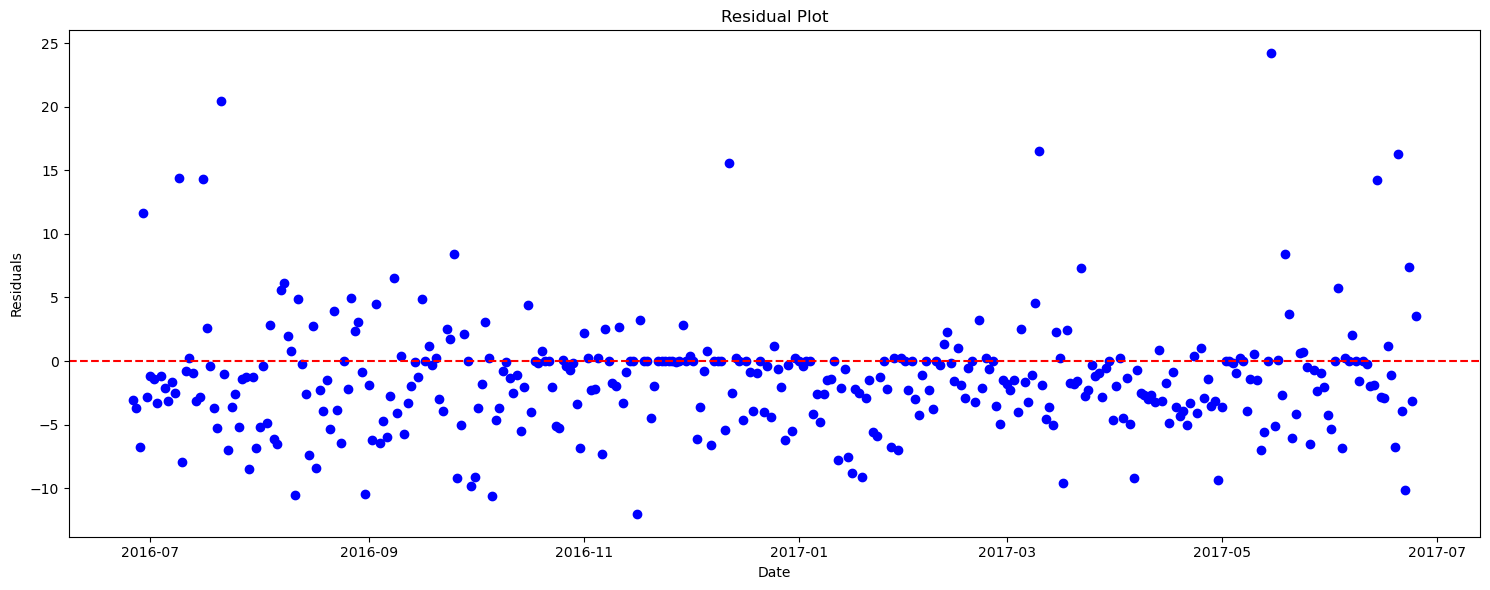

In [51]:
import matplotlib.pyplot as plt

# Compute the residuals
y_true = test_data['y'].values
y_pred = forecast['yhat'][-365:].values
residuals = y_true - y_pred

# Create the residual plot
plt.figure(figsize=(15, 6))
plt.scatter(forecast['ds'][-365:], residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()


In [52]:
from prophet import Prophet

# Rename columns for Prophet
prophet_data = encoded_data_filtered.rename(columns={'Date': 'ds', 'MaxTemp': 'y'})

# Split the data into training and test sets (using the last 365 days as test data)
train_data = prophet_data[:-365]
test_data = prophet_data[-365:]

# Display the first few rows of the training data
train_data.head()


,ds,Location,MinTemp,y,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
128291,2013-04-01,WALPOLE,12.1,25.0,0.2,3.807291,6.918742,30.0,7.0,11.0,...,False,False,True,False,False,False,False,False,False,False
128292,2013-04-02,WALPOLE,14.7,29.9,0.0,6.840968,7.754023,43.0,20.0,9.0,...,False,False,True,False,False,False,False,False,False,False
128293,2013-04-03,WALPOLE,18.0,30.9,0.0,8.192026,6.792817,35.0,13.0,11.0,...,False,False,True,False,False,False,False,False,False,False
128294,2013-04-04,WALPOLE,18.6,33.8,0.0,9.868503,10.324927,39.0,20.0,15.0,...,False,False,False,False,False,False,False,False,True,False
128295,2013-04-05,WALPOLE,16.5,26.1,0.0,5.520695,6.931183,39.0,15.0,17.0,...,False,False,False,False,False,False,False,False,True,False


In [53]:
from prophet import Prophet

# Initialize the Prophet model
model = Prophet()

# Add the one-hot encoded columns (and any other relevant numerical columns) as regressors
regressor_columns = [col for col in train_data.columns if 'WindGustDir' in col] + \
                    [col for col in train_data.columns if 'WindDir9am' in col] + \
                    [col for col in train_data.columns if 'WindDir3pm' in col] + \
                    ['MinTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 
                     'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                     'Pressure3pm', 'Temp9am', 'Temp3pm']

for column in regressor_columns:
    model.add_regressor(column)

# Now you can train the model using model.fit(train_data)

01:50:26 - cmdstanpy - INFO - Chain [1] start processing
01:50:27 - cmdstanpy - INFO - Chain [1] done processing


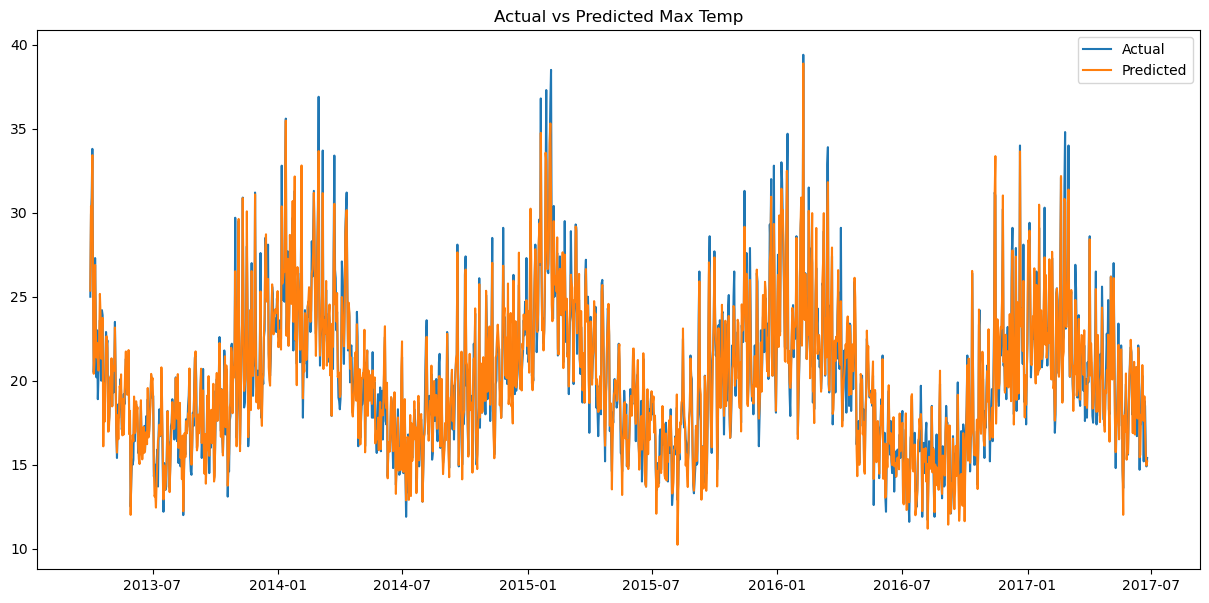

In [54]:
# Train the model
model.fit(train_data)

# Make predictions
import pandas as pd

# Assuming 'forecast_df' is your DataFrame containing Prophet forecasts
future = model.make_future_dataframe(periods=1095)
forecast = model.predict(pd.concat([train_data, test_data]))

forecast['yhat'] = forecast['yhat'].apply(lambda x: max(0, x))

# Plot actual vs predicted
plt.figure(figsize=(15, 7))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Max Temp')
plt.show()
# Replace 'path_to_your_data.csv' with the path to your dataset. Running this code locally should allow you to train the Prophet model, make predictions, and visualize the results.




In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = test_data['y'].values
y_pred = forecast['yhat'][-365:].values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"RMSE: {rmse}, MAE: {mae}, MAPE: {mape}%")

RMSE: 1.0319677787525758, MAE: 0.7746161090609236, MAPE: 4.053498985120179%


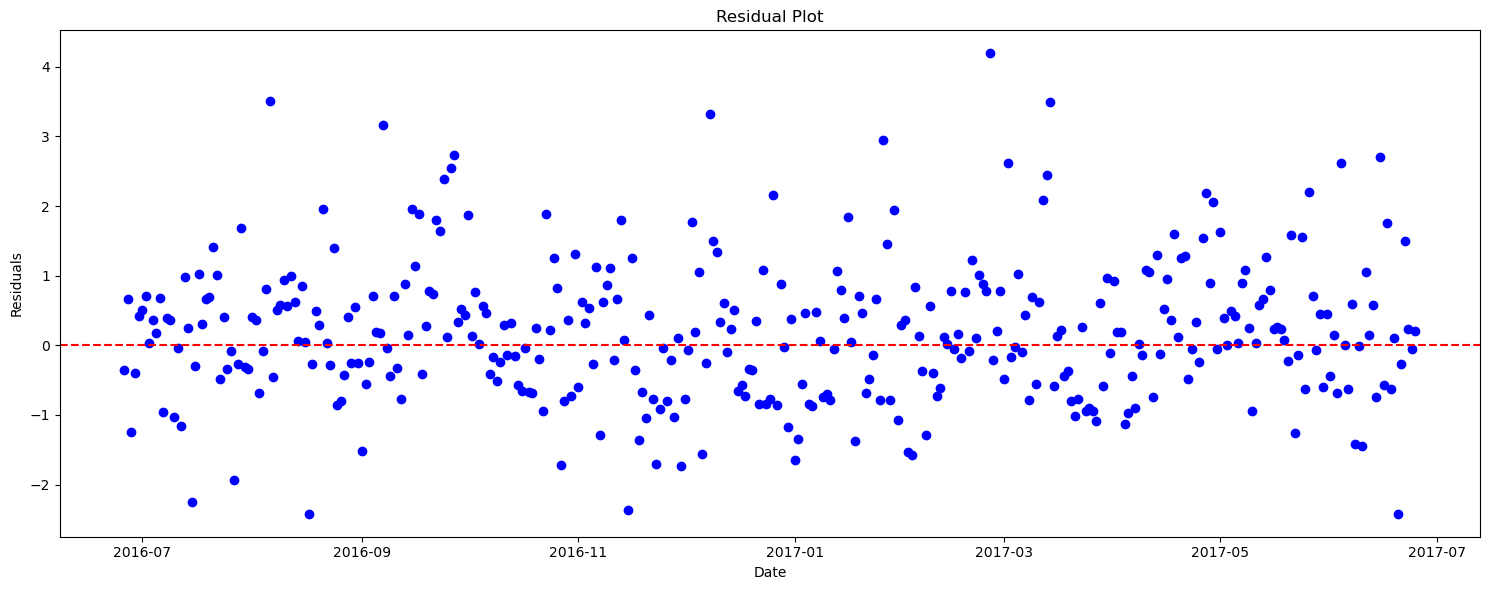

In [56]:
import matplotlib.pyplot as plt

# Compute the residuals
y_true = test_data['y'].values
y_pred = forecast['yhat'][-365:].values
residuals = y_true - y_pred

# Create the residual plot
plt.figure(figsize=(15, 6))
plt.scatter(forecast['ds'][-365:], residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

In [57]:
from prophet import Prophet

# Rename columns for Prophet
prophet_data = encoded_data_filtered.rename(columns={'Date': 'ds', 'Humidity9am': 'y'})

# Split the data into training and test sets (using the last 365 days as test data)
train_data = prophet_data[:-365]
test_data = prophet_data[-365:]

# Display the first few rows of the training data
train_data.head()


,ds,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
128291,2013-04-01,WALPOLE,12.1,25.0,0.2,3.807291,6.918742,30.0,7.0,11.0,...,False,False,True,False,False,False,False,False,False,False
128292,2013-04-02,WALPOLE,14.7,29.9,0.0,6.840968,7.754023,43.0,20.0,9.0,...,False,False,True,False,False,False,False,False,False,False
128293,2013-04-03,WALPOLE,18.0,30.9,0.0,8.192026,6.792817,35.0,13.0,11.0,...,False,False,True,False,False,False,False,False,False,False
128294,2013-04-04,WALPOLE,18.6,33.8,0.0,9.868503,10.324927,39.0,20.0,15.0,...,False,False,False,False,False,False,False,False,True,False
128295,2013-04-05,WALPOLE,16.5,26.1,0.0,5.520695,6.931183,39.0,15.0,17.0,...,False,False,False,False,False,False,False,False,True,False


In [58]:
from prophet import Prophet

# Initialize the Prophet model
model = Prophet()

# Add the one-hot encoded columns (and any other relevant numerical columns) as regressors
regressor_columns = [col for col in train_data.columns if 'WindGustDir' in col] + \
                    [col for col in train_data.columns if 'WindDir9am' in col] + \
                    [col for col in train_data.columns if 'WindDir3pm' in col] + \
                    ['MinTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 
                     'WindSpeed3pm', 'MaxTemp', 'Humidity3pm', 'Pressure9am', 
                     'Pressure3pm', 'Temp9am', 'Temp3pm']

for column in regressor_columns:
    model.add_regressor(column)

# Now you can train the model using model.fit(train_data)

01:50:28 - cmdstanpy - INFO - Chain [1] start processing
01:50:28 - cmdstanpy - INFO - Chain [1] done processing


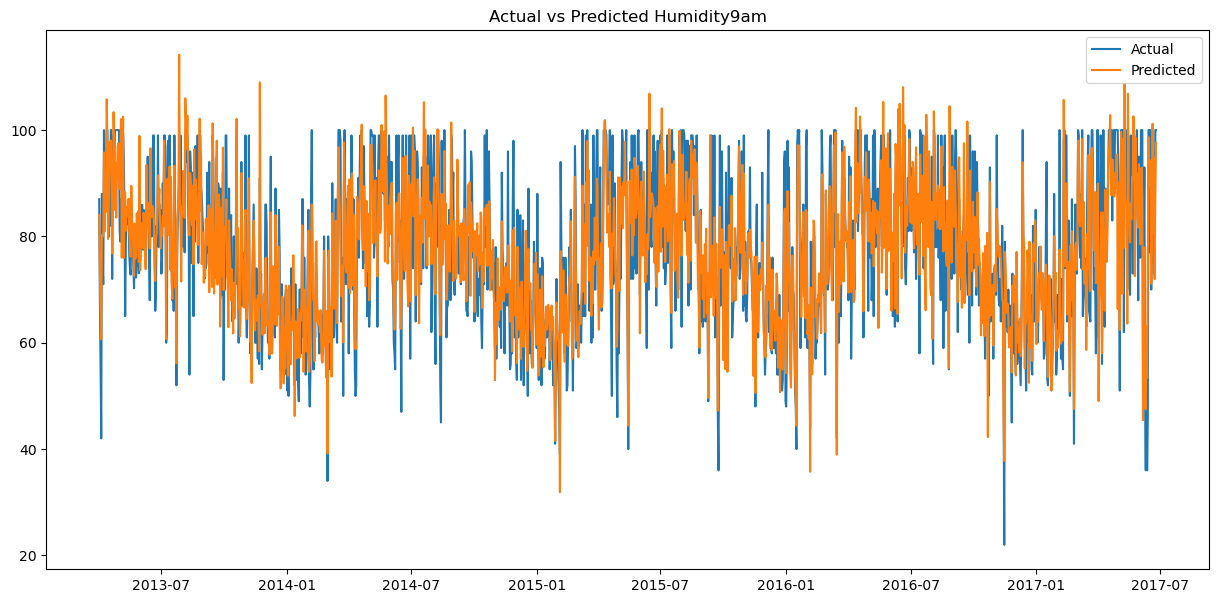

In [59]:
# Train the model
model.fit(train_data)

# Make predictions
import pandas as pd

# Assuming 'forecast_df' is your DataFrame containing Prophet forecasts
future = model.make_future_dataframe(periods=1095)
forecast = model.predict(pd.concat([train_data, test_data]))

forecast['yhat'] = forecast['yhat'].apply(lambda x: max(0, x))

# Plot actual vs predicted
plt.figure(figsize=(15, 7))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Humidity9am')
plt.show()
# Replace 'path_to_your_data.csv' with the path to your dataset. Running this code locally should allow you to train the Prophet model, make predictions, and visualize the results.




In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = test_data['y'].values
y_pred = forecast['yhat'][-365:].values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"RMSE: {rmse}, MAE: {mae}, MAPE: {mape}%")

RMSE: 8.777496634090307, MAE: 6.753289220309139, MAPE: 9.24684082090255%


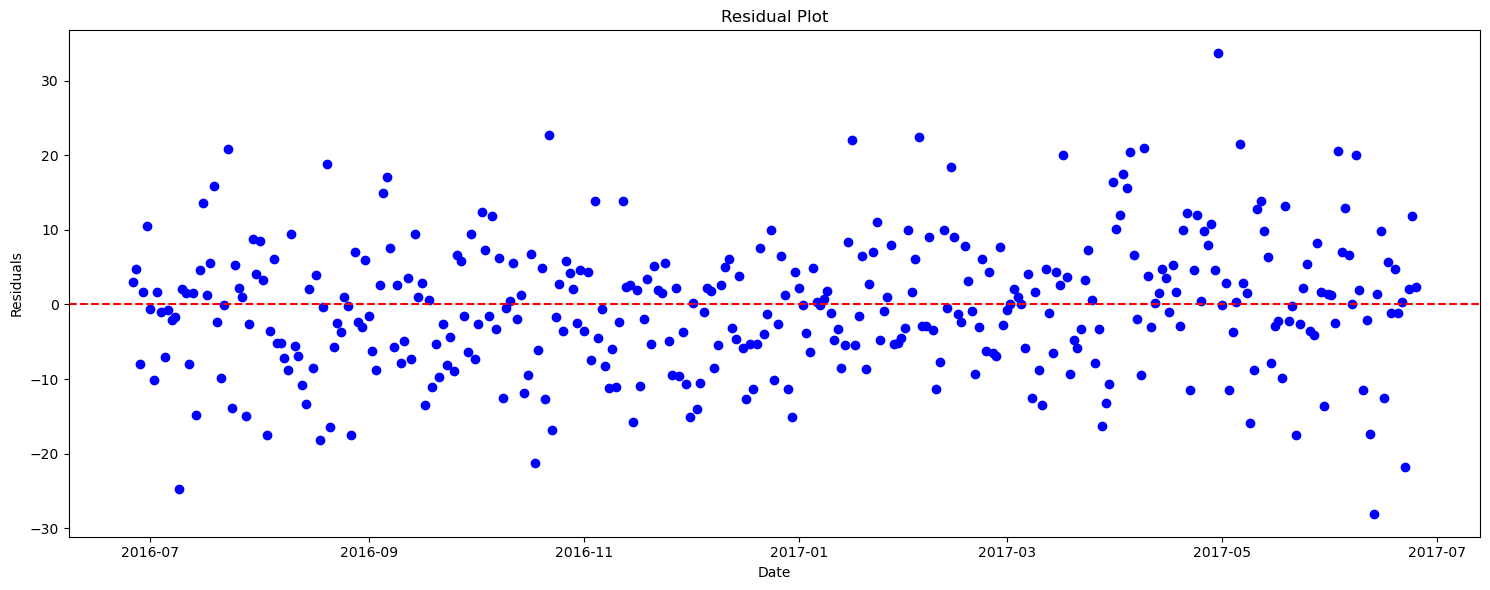

In [61]:
import matplotlib.pyplot as plt

# Compute the residuals
y_true = test_data['y'].values
y_pred = forecast['yhat'][-365:].values
residuals = y_true - y_pred

# Create the residual plot
plt.figure(figsize=(15, 6))
plt.scatter(forecast['ds'][-365:], residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()